## Loan Prediction (whether a person will return loan 'Y'  or not 'N')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## Importing data

In [2]:
data = pd.read_csv('/Users/user/Projects/Loan prediction/train_u6lujuX_CVtuZ9i.csv', index_col='Loan_ID')
dataTest = pd.read_csv('/Users/user/Projects/Loan prediction/test_Y3wMUE5_7gLdaTN.csv', index_col='Loan_ID')

In [3]:
data.shape     # Train Data

(614, 12)

In [4]:
dataTest.shape   # Test data 

(367, 11)

### Concatenate train and test data for data munging

In [5]:
fullData = pd.concat([data,dataTest], axis=0)

In [6]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 12 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


### Loan Status : to be predicted

In [303]:
### We have some missing values in other features

In [8]:
fullData.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

### Analyzing each featuer with output(Loan_Staus)

In [9]:
#### Gender

In [10]:
%matplotlib inline

In [11]:
data.groupby('Gender').Loan_Status.value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: Loan_Status, dtype: int64

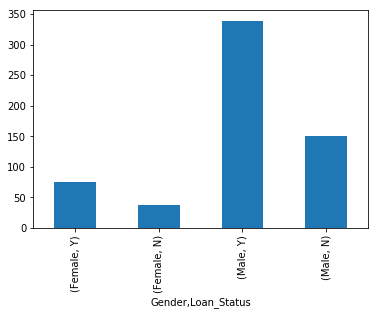

In [12]:
data.groupby('Gender').Loan_Status.value_counts().plot(kind='bar')

In [13]:
#### Married

In [14]:
data.groupby('Married').Loan_Status.value_counts()

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              285
         N              113
Name: Loan_Status, dtype: int64

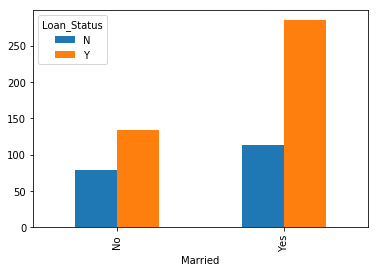

In [15]:
pd.crosstab(data.Married, data.Loan_Status).plot(kind='bar')

In [16]:
#### Dependents

In [17]:
data.groupby('Dependents').Loan_Status.value_counts()

Dependents  Loan_Status
0           Y              238
            N              107
1           Y               66
            N               36
2           Y               76
            N               25
3+          Y               33
            N               18
Name: Loan_Status, dtype: int64

In [18]:
#### Education

In [19]:
data.groupby('Education').Loan_Status.value_counts()

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: Loan_Status, dtype: int64

In [20]:
#### Self_Employed

In [21]:
data.groupby('Self_Employed').Loan_Status.value_counts()

Self_Employed  Loan_Status
No             Y              343
               N              157
Yes            Y               56
               N               26
Name: Loan_Status, dtype: int64

In [22]:
#### Applicant_Income

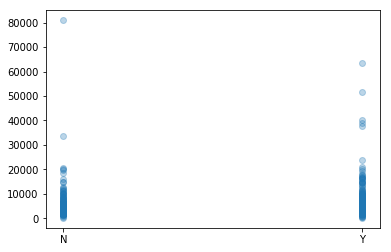

In [23]:
plt.scatter(data['Loan_Status'], data['ApplicantIncome'], alpha=0.3)

In [24]:
#### CoapplicantIncome

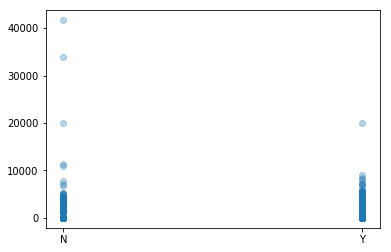

In [25]:
plt.scatter(data['Loan_Status'], data['CoapplicantIncome'], alpha=0.3)

In [26]:
#### LoanAmount

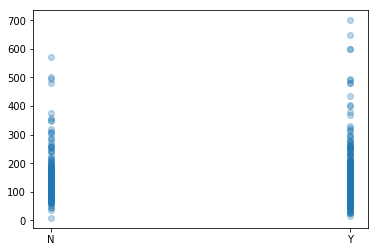

In [27]:
plt.scatter(data['Loan_Status'], data['LoanAmount'], alpha=0.3)

In [28]:
#### Credit_History

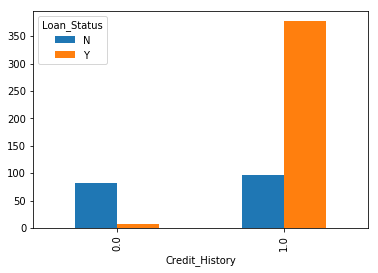

In [29]:
pd.crosstab(data.Credit_History, data.Loan_Status).plot(kind='bar')

In [30]:
##### We have a strong correlation here as people having 0 credit history have Loan Status 'N'

In [31]:
#### Property_Area

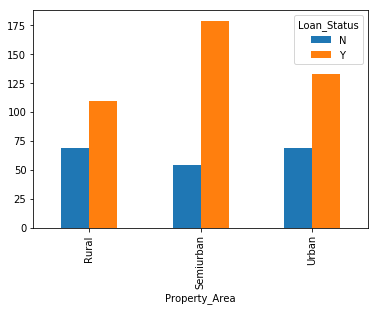

In [32]:
pd.crosstab(data.Property_Area, data.Loan_Status).plot(kind='bar')

## Dealing with Missing Values

### Gender

In [33]:
fullData[fullData.Gender.isnull()]

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
Loan_ID,,,,,,,,,,,,
LP001050,3365,1917.0,0.0,2,Not Graduate,NaN,112.0,360.0,N,Yes,Rural,No
LP001448,23803,0.0,1.0,3+,Graduate,NaN,370.0,360.0,Y,Yes,Rural,No
LP001585,51763,0.0,1.0,3+,Graduate,NaN,700.0,300.0,Y,Yes,Urban,No
LP001644,674,5296.0,1.0,0,Graduate,NaN,168.0,360.0,Y,Yes,Rural,Yes
LP002024,2473,1843.0,1.0,0,Graduate,NaN,159.0,360.0,N,Yes,Rural,No
LP002103,9833,1833.0,1.0,1,Graduate,NaN,182.0,180.0,Y,Yes,Urban,Yes
LP002478,2083,4083.0,NaN,0,Graduate,NaN,160.0,360.0,Y,Yes,Semiurban,Yes
LP002501,16692,0.0,1.0,0,Graduate,NaN,110.0,360.0,Y,Yes,Semiurban,No
LP002530,2873,1872.0,0.0,2,Graduate,NaN,132.0,360.0,N,Yes,Semiurban,No


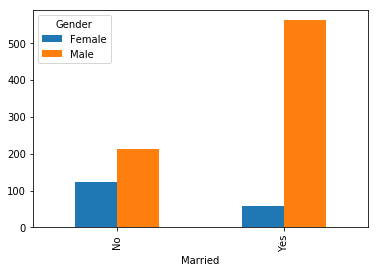

In [34]:
pd.crosstab(fullData.Married, fullData.Gender).plot(kind = 'bar')

In [35]:
fullData.groupby('Married').Gender.value_counts() # when married 90% chance is Gender is male

Married  Gender
No       Male      212
         Female    124
Yes      Male      561
         Female     57
Name: Gender, dtype: int64

### Filling missing values when married with male

In [36]:
fullData.loc[(fullData.Gender.isnull() & (fullData.Married == 'Yes')),'Gender'] = 'Male'

In [37]:
fullData[fullData.Gender.isnull()]  # missing values remaining samples

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
Loan_ID,,,,,,,,,,,,
LP002625,3583,0.0,1.0,0,Graduate,NaN,96.0,360.0,N,No,Urban,No
LP002925,4750,0.0,1.0,0,Graduate,NaN,94.0,360.0,Y,No,Semiurban,No
LP002933,9357,0.0,1.0,3+,Graduate,NaN,292.0,360.0,Y,No,Semiurban,Yes
LP001128,3909,0.0,1.0,0,Graduate,NaN,101.0,360.0,NaN,No,Urban,No
LP001563,1596,1760.0,0.0,0,Graduate,NaN,119.0,360.0,NaN,No,Urban,No
LP001769,3333,1250.0,1.0,NaN,Graduate,NaN,110.0,360.0,NaN,No,Semiurban,No
LP002165,2038,4027.0,1.0,1,Not Graduate,NaN,100.0,360.0,NaN,No,Rural,No
LP002298,2860,2988.0,1.0,0,Graduate,NaN,138.0,360.0,NaN,No,Urban,Yes
LP002553,29167,0.0,1.0,0,Graduate,NaN,185.0,360.0,NaN,No,Semiurban,No


In [38]:
fullData.groupby(['Married','Dependents']).Gender.value_counts() 

Married  Dependents  Gender
No       0           Male      178
                     Female     90
         1           Female     20
                     Male       15
         2           Male       10
                     Female      4
         3+          Female      6
                     Male        5
Yes      0           Male      236
                     Female     33
         1           Male      112
                     Female     12
         2           Male      137
                     Female      9
         3+          Male       76
                     Female      3
Name: Gender, dtype: int64

### Filling remaining values acc. to Married and Dependents attributes

In [39]:
fullData.set_value(['LP002625','LP002933'], 'Gender', 'Female') 
fullData.Gender.fillna('Male', inplace=True)

In [40]:
fullData.Gender.isnull().sum()

0

## 2 Married

In [41]:
fullData[fullData.Married.isnull()]

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
Loan_ID,,,,,,,,,,,,
LP001357,3816,754.0,1.0,NaN,Graduate,Male,160.0,360.0,Y,NaN,Urban,No
LP001760,4758,0.0,1.0,NaN,Graduate,Male,158.0,480.0,Y,NaN,Semiurban,No
LP002393,10047,0.0,1.0,NaN,Graduate,Female,NaN,240.0,Y,NaN,Semiurban,No


In [42]:
fullData.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [43]:
fullData.groupby(['Married']).CoapplicantIncome.median()  

Married
No        0.0
Yes    1526.0
Name: CoapplicantIncome, dtype: float64

In [44]:
#### not married when coappliant income is zero.

In [45]:
fullData.loc[((fullData.Married.isnull()) & (fullData.CoapplicantIncome == 0)), 'Married'] = 'No'

In [46]:
fullData.loc['LP001357', 'Married'] = 'Yes'

In [47]:
fullData.Married.isnull().sum()

0

In [48]:
fullData.Married.value_counts()

Yes    632
No     349
Name: Married, dtype: int64

## 3. Dependents

In [49]:
fullData[fullData.Dependents.isnull()]

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
Loan_ID,,,,,,,,,,,,
LP001350,13650,0.0,1.0,NaN,Graduate,Male,NaN,360.0,Y,Yes,Urban,No
LP001357,3816,754.0,1.0,NaN,Graduate,Male,160.0,360.0,Y,Yes,Urban,No
LP001426,5667,2667.0,1.0,NaN,Graduate,Male,180.0,360.0,Y,Yes,Rural,No
LP001754,4735,0.0,1.0,NaN,Not Graduate,Male,138.0,360.0,N,Yes,Urban,Yes
LP001760,4758,0.0,1.0,NaN,Graduate,Male,158.0,480.0,Y,No,Semiurban,No
LP001945,5417,0.0,0.0,NaN,Graduate,Female,143.0,480.0,N,No,Urban,No
LP001972,2875,1750.0,1.0,NaN,Not Graduate,Male,105.0,360.0,Y,Yes,Semiurban,No
LP002100,2833,0.0,1.0,NaN,Graduate,Male,71.0,360.0,Y,No,Urban,No
LP002106,5503,4490.0,1.0,NaN,Graduate,Male,70.0,NaN,Y,Yes,Semiurban,Yes


In [50]:
fullData.Dependents.isnull().sum()

25

In [51]:
fullData.Dependents.value_counts()  

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

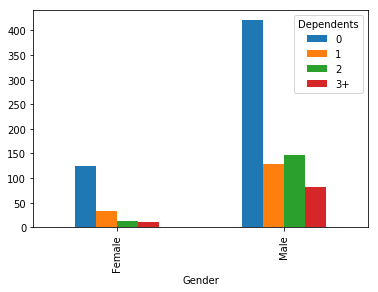

In [52]:
pd.crosstab(fullData.Gender, fullData.Dependents).plot(kind='bar')

In [53]:
fullData.groupby(['Gender', 'Dependents']).CoapplicantIncome.median()

Gender  Dependents
Female  0                0.0
        1                0.0
        2             1881.0
        3+               0.0
Male    0             1666.0
        1             1662.5
        2             1110.0
        3+             187.0
Name: CoapplicantIncome, dtype: float64

In [54]:
#### Male with zero Coapplicant Income had '3+' Dependents

In [55]:
fullData.loc[((fullData.Dependents.isnull()) & (fullData.Gender=='Male') & (fullData.CoapplicantIncome==0)), 'Dependents'] = '3+'

In [56]:
fullData.groupby(['Gender']).Dependents.value_counts()

Gender  Dependents
Female  0             124
        1              32
        2              13
        3+             10
Male    0             421
        2             147
        1             128
        3+             89
Name: Dependents, dtype: int64

In [57]:
#### Both males and females has high percentage of '0' dependents

In [58]:
fullData.Dependents.fillna('0', inplace=True)

In [59]:
fullData.Dependents.isnull().sum()

0

## 4. Self Employed

In [60]:
fullData.Self_Employed.isnull().sum()

55

In [61]:
fullData.Self_Employed.value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [62]:
#### Lets look at the Applicant Income of those who are self employed and those who are not

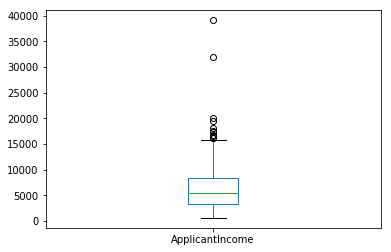

In [63]:
fullData[fullData.Self_Employed=='Yes'].ApplicantIncome.plot(kind='box')

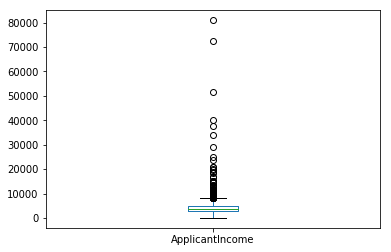

In [64]:
fullData[fullData.Self_Employed=='No'].ApplicantIncome.plot(kind='box')

In [65]:
### So it can be inferred that people with Applicant Income less than 10,000 have less chance to be self employed

In [66]:
fullData.loc[((fullData.Self_Employed.isnull()) & (fullData.ApplicantIncome < 10000)), 'Self_Employed'] = 'No'
fullData.loc[((fullData.Self_Employed.isnull()) & (fullData.ApplicantIncome >= 10000)), 'Self_Employed'] = 'Yes'

In [67]:
fullData.Self_Employed.isnull().sum()

0

## 5. Loan Amount

In [68]:
fullData.LoanAmount.isnull().sum()

27

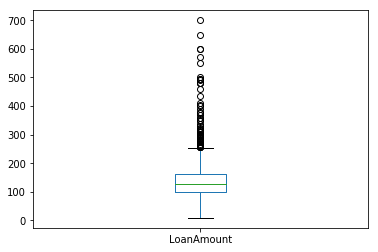

In [69]:
fullData.LoanAmount.plot(kind='box')

/Users/user/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


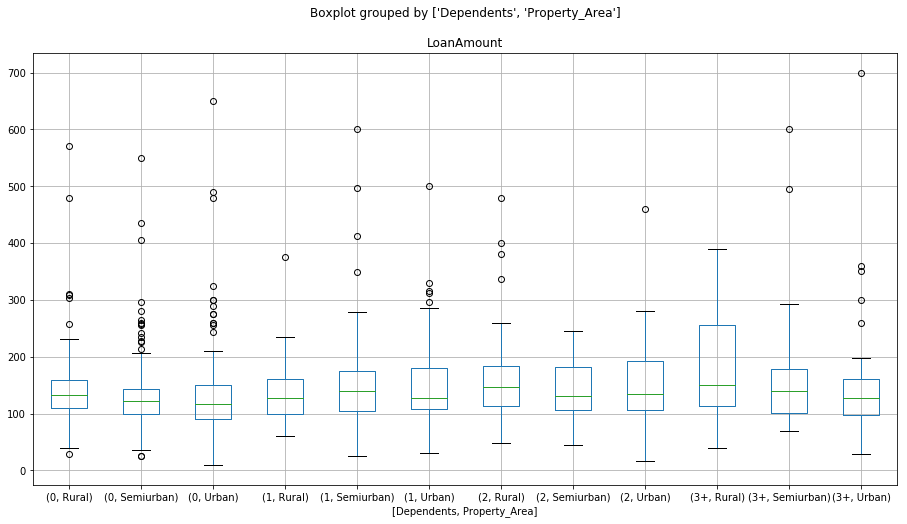

In [70]:
fullData.boxplot('LoanAmount', [ 'Dependents', 'Property_Area'], figsize=(15,8))

In [71]:
fullData.groupby([ 'Property_Area','Dependents']).LoanAmount.median()

Property_Area  Dependents
Rural          0             132.0
               1             128.0
               2             147.0
               3+            150.0
Semiurban      0             122.0
               1             140.0
               2             131.0
               3+            139.0
Urban          0             116.0
               1             127.0
               2             134.5
               3+            126.5
Name: LoanAmount, dtype: float64

In [72]:
# Fill the null places with these median values

In [73]:
medianVals = fullData.groupby([ 'Property_Area','Dependents']).LoanAmount.transform('median')
fullData.LoanAmount.fillna(medianVals, inplace=True)

In [74]:
fullData.LoanAmount.isnull().sum()

0

## 6. Loan Amount Term

In [75]:
fullData.Loan_Amount_Term.isnull().sum()

20

In [76]:
fullData.Loan_Amount_Term.value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [77]:
### Since 90% of the data has term of 360 we can fill values with 360

In [78]:
fullData.Loan_Amount_Term.fillna(360.0, inplace=True)

In [79]:
fullData.Loan_Amount_Term.isnull().sum()

0

## 7. Credit History

In [80]:
fullData.Credit_History.isnull().sum()

79

In [81]:
fullData.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

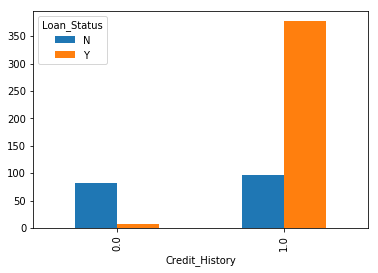

In [82]:
pd.crosstab(data.Credit_History, data.Loan_Status).plot(kind='bar')

In [83]:
# Strong correlation, when credit history is 0 loan status is N

In [84]:
#data.Credit_History.fillna(1.0, inplace=True)
fullData.loc[ (pd.isnull(fullData['Credit_History'])) & (fullData['Loan_Status'] == 'Y'), 'Credit_History'] = 1
fullData.loc[ (pd.isnull(fullData['Credit_History'])) & (fullData['Loan_Status'] == 'N'), 'Credit_History'] = 0

In [85]:
fullData.Credit_History.isnull().sum()

29

In [86]:
# Since we don't have loan Status for these 29 values, fill these with majority element 1

In [87]:
fullData.Credit_History.fillna(1,inplace=True)

In [88]:
fullData.isnull().sum() # 367 values for Loan Status has to be predicted

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
dtype: int64

## Converting string into numerical values

In [89]:
fullData['Gender'] = fullData['Gender'].map(lambda x: 1 if x=='Male' else 0)

In [90]:
fullData['Married'] = fullData['Married'].map(lambda x: 1 if x=='Yes' else 0)

In [91]:
fullData.loc[(fullData['Dependents'] == '3+'), 'Dependents'] = 3

In [92]:
fullData.Dependents = fullData.Dependents.astype('int32')

In [93]:
fullData['Education'] = fullData['Education'].map(lambda x: 1 if x=='Graduate' else 0)

In [94]:
fullData['Self_Employed'] = fullData['Self_Employed'].map(lambda x: 1 if x=='No' else 0)

In [95]:
fullData.loc[(fullData['Property_Area'] == 'Rural'), 'Property_Area'] = 0
fullData.loc[(fullData['Property_Area'] == 'Semiurban'), 'Property_Area'] = 1
fullData.loc[(fullData['Property_Area'] == 'Urban'), 'Property_Area'] = 2

In [96]:
fullData.Property_Area = fullData.Property_Area.astype('int64')

In [97]:
fullData['Loan_Status'] = fullData['Loan_Status'].map(lambda x: 1 if x=='Y' else 0)

In [98]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 12 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       981 non-null float64
Dependents           981 non-null int32
Education            981 non-null int64
Gender               981 non-null int64
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Loan_Status          981 non-null int64
Married              981 non-null int64
Property_Area        981 non-null int64
Self_Employed        981 non-null int64
dtypes: float64(4), int32(1), int64(7)
memory usage: 135.8+ KB


## Dealing with outliers

### 1. Applicant Income and Coapplicant Income

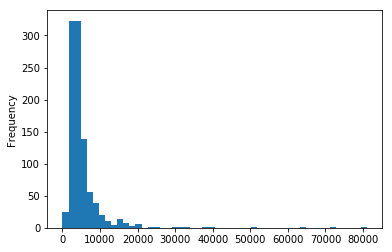

In [99]:
fullData.ApplicantIncome.plot(kind='hist', bins=50)

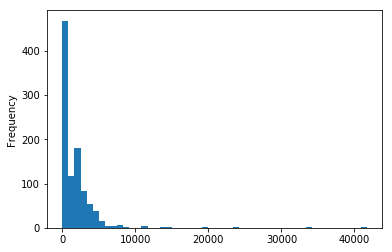

In [100]:
fullData.CoapplicantIncome.plot(kind='hist', bins=50)

In [101]:
# Any one of them is high there is high chance that he can repay the loan

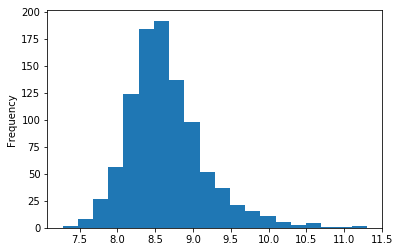

In [102]:
fullData['TotalIncome_log'] = np.log(fullData['ApplicantIncome'] + fullData['CoapplicantIncome'])
fullData.TotalIncome_log.plot(kind='hist', bins=20)    # taking log

## 2. Loan Amount

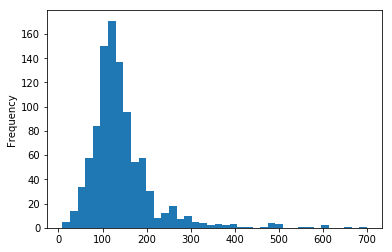

In [103]:
fullData.LoanAmount.plot(kind='hist', bins=40)

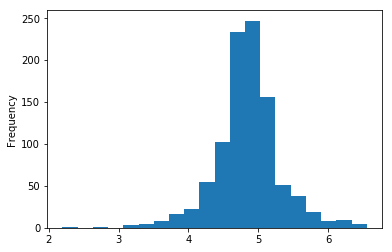

In [104]:
fullData['LoanAmount_log'] = np.log(fullData['LoanAmount'])
fullData.LoanAmount_log.plot(kind='hist', bins=20)

In [105]:
fullData.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,TotalIncome_log,LoanAmount_log
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,5179.795107,1601.916330,0.835882,0.792049,0.777778,0.812436,142.089195,342.564730,0.430173,0.644241,1.053007,0.873598,8.649904,4.845808
std,5695.104533,2718.772806,0.370572,1.047630,0.415952,0.390562,76.405019,64.482011,0.495353,0.478987,0.801302,0.332471,0.520593,0.467900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000,0.000000,0.000000,0.000000,7.273786,2.197225
25%,2875.000000,0.000000,1.000000,0.000000,1.000000,1.000000,101.000000,360.000000,0.000000,0.000000,0.000000,1.000000,8.334712,4.615121
50%,3800.000000,1110.000000,1.000000,0.000000,1.000000,1.000000,126.500000,360.000000,0.000000,1.000000,1.000000,1.000000,8.578100,4.840242
75%,5516.000000,2365.000000,1.000000,2.000000,1.000000,1.000000,160.000000,360.000000,1.000000,1.000000,2.000000,1.000000,8.896725,5.075174
max,81000.000000,41667.000000,1.000000,3.000000,1.000000,1.000000,700.000000,480.000000,1.000000,1.000000,2.000000,1.000000,11.302204,6.551080


# Making a model

In [106]:
features=['Credit_History','Dependents', 'Education','Gender', 'Loan_Amount_Term', 'Married','Property_Area', 
                                                             'Self_Employed', 'TotalIncome_log', 'LoanAmount_log']

In [107]:
X = fullData.loc[:,features]
y = fullData.loc[:,'Loan_Status']

In [115]:
XTrain1, yTrain1 = X[:450], y[:450]
XTrain2, yTrain2 = X[450:614], y[450:614]
XTrain, yTrain = X[:614], y[:614]
XTest, yTest = X[614:], y[614:]

In [116]:
features_used=['Credit_History','Dependents', 'Education', 'Married','Property_Area', 
                                                            'TotalIncome_log', 'LoanAmount_log']

### 1. Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [118]:
scalar = StandardScaler()
XScaled = scalar.fit_transform(X)

In [121]:
XTrain1_Scaled = XScaled[:450]
XTrain2_Scaled = XScaled[450:614]
XTrain_Scaled = XScaled[:614]
XTest_Scaled = XScaled[614:]

In [211]:
clf_lg = LogisticRegression(C=0.000001, random_state=True, class_weight={1:1,0:1.4})
train_lg = clf_lg.fit(XTrain1_Scaled,yTrain1)
yPred_lg = train_lg.predict(XTrain2_Scaled)

In [212]:
print(classification_report(yTrain2, yPred_lg))
print('Accuracy:\t' + str(accuracy_score(yTrain2, yPred_lg)))

             precision    recall  f1-score   support

          0       0.85      0.56      0.67        52
          1       0.82      0.96      0.88       112

avg / total       0.83      0.83      0.82       164

Accuracy:	0.829268292683


### 2. Decision Tree

In [230]:
clf_dt = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=15, max_depth=7)
print(cross_val_score(clf_dt,XTrain[features_used],yTrain, cv=4))
train_dt = clf_dt.fit(XTrain1,yTrain1)
yPred_dt = train_dt.predict(XTrain2)

[ 0.78571429  0.71428571  0.83006536  0.80392157]


In [231]:
print(classification_report(yTrain2, yPred_dt))
print('Accuracy:\t' + str(accuracy_score(yTrain2, yPred_dt)))

             precision    recall  f1-score   support

          0       0.72      0.56      0.63        52
          1       0.81      0.90      0.86       112

avg / total       0.79      0.79      0.78       164

Accuracy:	0.792682926829


### 3. Random Forest

In [257]:
clf_rf = RandomForestClassifier(criterion='entropy', n_estimators=20, min_samples_leaf=15,max_depth=7)
print(cross_val_score(clf_rf,XTrain[features_used],yTrain, cv=4))
train_rf = clf_rf.fit(XTrain1[features_used],yTrain1)
yPred_rf = train_rf.predict(XTrain2[features_used])

[ 0.83116883  0.80519481  0.83006536  0.8496732 ]


In [258]:
print(classification_report(yTrain2, yPred_rf))
print('Accuracy:\t' + str(accuracy_score(yTrain2, yPred_rf)))

             precision    recall  f1-score   support

          0       0.94      0.56      0.70        52
          1       0.83      0.98      0.90       112

avg / total       0.86      0.85      0.83       164

Accuracy:	0.84756097561


In [302]:
## Checking for feature importances

In [606]:
train_rf.feature_importances_
pd.Series(train_rf.feature_importances_, index=features_used).sort_values(ascending=False) #select features accordinly

Credit_History     0.609817
TotalIncome_log    0.129124
LoanAmount_log     0.111722
Property_Area      0.110567
Dependents         0.021343
Married            0.017427
dtype: float64

### 4. SVM

In [300]:
clf_svm = SVC(C=1, kernel='rbf', degree=3, gamma=0.1)
print(cross_val_score(clf_svm,XTrain,yTrain, cv=4))
train_svm = clf_svm.fit(XTrain1,yTrain1)
yPred_svm = train_svm.predict(XTrain2)

[ 0.81168831  0.7987013   0.83660131  0.83006536]


In [301]:
print(classification_report(yTrain2, yPred_svm))
print('Accuracy:\t' + str(accuracy_score(yTrain2, yPred_svm)))

             precision    recall  f1-score   support

          0       0.90      0.50      0.64        52
          1       0.81      0.97      0.88       112

avg / total       0.84      0.82      0.81       164

Accuracy:	0.823170731707


In [607]:
# Out of these random forest is performing the best and we can use that on test data 

In [717]:
train_rf = clf_rf.fit(XTrain[features_used],yTrain)
yPred_rf = train_rf.predict(XTest[features_used])

In [718]:
soluSvm_df = pd.DataFrame({'Loan_ID': XTest.index, 'Loan_Status' : yPred_rf} )
soluSvm_df['Loan_Status'] = soluSvm_df['Loan_Status'].map(lambda x: 'Y' if x==1 else 'N')
soluSvm_df.to_csv('/Users/user/Projects/Loan prediction/solu_dir.csv', index=False)